In [238]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import glob, os
import numpy as np

In [240]:
#data sourced from https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime

# License for the data: 
# You are free to copy, distribute, transmit and adapt the data, as long as you credit the "City of Denver Open Data Catalog" and clearly indicate the license terms of this work (CC BY 3.0) .
# Where possible, “City of Denver Open Data Catalog” should be hyperlinked to http://data.denvergov.org and “CC BY 3.0” should be hyperlinked to http://creativecommons.org/licenses/by/3.0/.

schema = ['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_crime', 'is_traffic', 'victim_count']
def import_data(schema = schema):
    all_files = glob.glob(os.path.join("data/" , "crime*"))
    print("importing the following CSVs as crime data: ")
    print(all_files)
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0, encoding="ANSI")
        df.columns = schema
        li.append(df)

    crime = pd.concat(li, axis=0, ignore_index=True)
    return crime

In [241]:
crime = import_data()

importing the following CSVs as crime data: 
['data\\crime2012.csv', 'data\\crime2013.csv', 'data\\crime2014.csv', 'data\\crime2015.csv', 'data\\crime2016.csv', 'data\\crime2017-22.csv']


In [242]:
crime["first_occurrence_date"] = pd.to_datetime(crime["first_occurrence_date"], format='%m/%d/%Y %I:%M:%S %p') #change dtype of this column to datetime
crime["date"] = crime["first_occurrence_date"].dt.date
crime["year-month"] = crime["first_occurrence_date"].dt.to_period('M').astype(str)
crime["month"] = crime["first_occurrence_date"].dt.month
crime["day"] = crime["first_occurrence_date"].dt.day
crime["year"] = crime["first_occurrence_date"].dt.year
#lets drop the most last month in this dataset because of partial data leading to incomplete aggregates
crime = crime[(crime["date"] > date(2013, 5, 1)) & (crime["date"] < date(2022, 10, 31))] 

In [235]:
pre_pandemic_crime = crime[(crime["date"] > dataset_start) & (crime["date"] < pandemic_begin)] 
#jan 10 2020 is the day WHO announced that the ubreak in Wuhan China is caused by COVID19, CDC soon to screen for COVID from flights. We will call this beginning of pandemic
# source: https://www.cdc.gov/museum/timeline/covid19.html#:~:text=January%2010%2C%202020,%2DnCoV)%20on%20its%20website.
pandemic_crime = crime[(crime["date"] > date(2020, 1, 1)) & (crime["date"] < dataset_end)] 
#two rounds of stimi checks sent out in this timeframe: https://www.fool.com/the-ascent/personal-finance/stimulus-checks/#:~:text=March%2027%3A%20The%20CARES%20Act,around%205%20million%20per%20week.
# first round in April 2020, second in December 2021

In [236]:
#lets count total crimes by month during the pandemic
count_by_month_pandemic = pandemic_crime.groupby("year-month")["incident_id"].nunique()
count_by_month_pre_pandemic = pre_pandemic_crime.groupby("year-month")["incident_id"].nunique()
count_by_month_all = crime.groupby("year-month")["incident_id"].nunique()

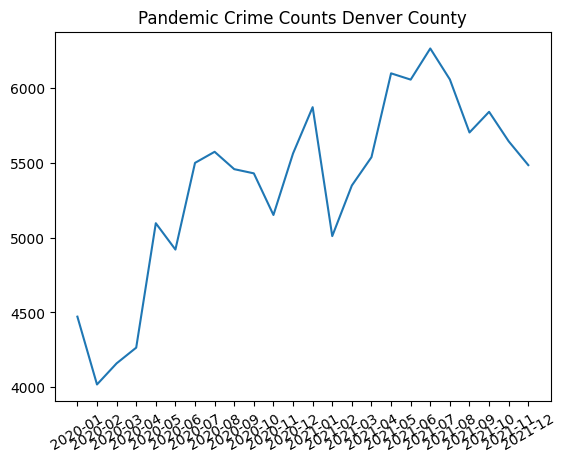

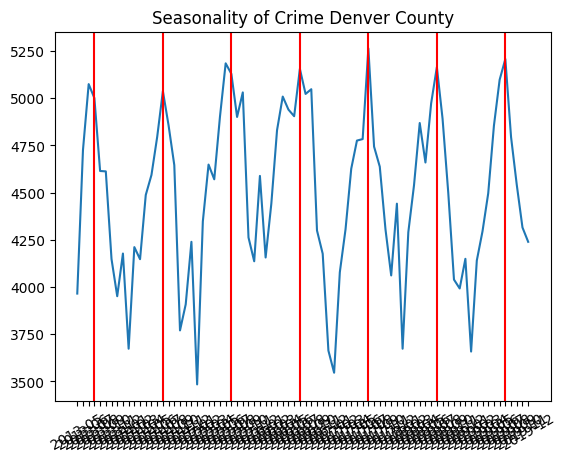

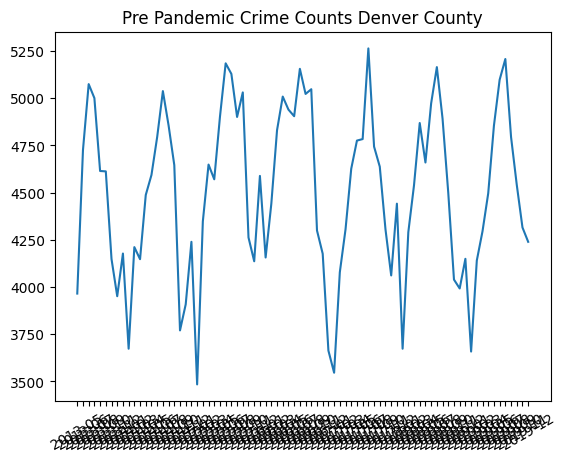

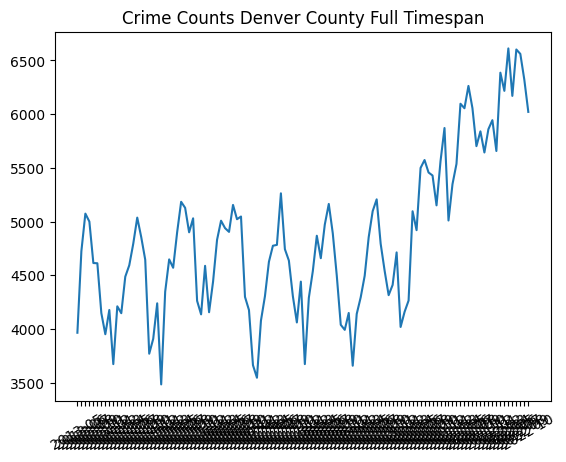

In [244]:
plt.plot(count_by_month_pandemic.index, count_by_month_pandemic.values)
plt.title("Pandemic Crime Counts Denver County")
plt.xticks(rotation = 30)
#plt.savefig("figures/pandemic_crime_counts.png") #saving figure for reports
plt.show()

plt.plot(count_by_month_pre_pandemic.index, count_by_month_pre_pandemic.values)
plt.title("Seasonality of Crime Denver County")
plt.xticks(rotation = 30)
plt.axvline(x = "2013-08", color = 'r', label = 'August')
plt.axvline(x = "2014-08", color = 'r', label = 'August')
plt.axvline(x = "2015-08", color = 'r', label = 'August')
plt.axvline(x = "2016-08", color = 'r', label = 'August')
plt.axvline(x = "2017-08", color = 'r', label = 'August')
plt.axvline(x = "2018-08", color = 'r', label = 'August')
plt.axvline(x = "2019-08", color = 'r', label = 'August')
#plt.savefig("figures/pandemic_crime_counts_vert_bars.png") #saving figure for reports
plt.show() 

plt.plot(count_by_month_pre_pandemic.index, count_by_month_pre_pandemic.values)
plt.title("Pre Pandemic Crime Counts Denver County")
plt.xticks(rotation = 30)
#plt.savefig("figures/pre_pandemic_crime_counts.png") #saving figure for reports
plt.show()

plt.plot(count_by_month_all.index, count_by_month_all.values)
plt.title("Crime Counts Denver County Full Timespan")
plt.xticks(rotation = 30)
#plt.savefig("figures/full_time_range_crime_counts.png") #saving figure for reports
plt.show()

In [103]:
#lets get a list of all the different types of crime we measure here
crime_categories = crime["offense_category_id"].unique()
print("Crime Categories collected by NIBRS")
print(crime_categories)

Crime Categories collected by NIBRS
['public-disorder' 'drug-alcohol' 'sexual-assault'
 'other-crimes-against-persons' 'all-other-crimes' 'murder' 'robbery'
 'aggravated-assault' 'arson' 'burglary' 'larceny'
 'theft-from-motor-vehicle' 'auto-theft' 'white-collar-crime']


In [104]:
#lets breakdown crime by category and year/month to understand how EACH crime category changed before/during the pandemic.
pre_pandemic_crime_categorized = pre_pandemic_crime.groupby(["year", "month", "offense_category_id"])["incident_id"].nunique()
pandemic_crime_categorized = pandemic_crime.groupby(["year","month", "offense_category_id"])["incident_id"].nunique()

In [245]:
#now lets find the average, min, max, standard deviation for each month before and during the pandemic
pre_pandemic_monthly_crime_averages_categorized = pre_pandemic_crime_categorized.groupby(["month", "offense_category_id"]).aggregate(["mean", "std", "min", "max"])
pandemic_monthly_crime_averages_categorized = pandemic_crime_categorized.groupby(["month", "offense_category_id"]).agg(["mean", "std", "min", "max"])

What did we just do? We first grouped by year, month, and crime to calculate the number of crimes of each type occuring in each month/year.

We then grouped only by month and crime to find the average and standard deviation of crime counts from year to year

For example we can now find the mean and std of aggravated assult in january with the following:

In [246]:
pre_pandemic_monthly_crime_averages_categorized.loc[( 1,'aggravated-assault')]

mean    149.000000
std      16.661332
min     124.000000
max     172.000000
Name: (1, aggravated-assault), dtype: float64

This means that in January pre-pandemic there were an average of 149 aggravated assults with a standard deviation of 16 cases from year to year.

In [247]:
#lets separate these tables into their own columns for later.
pre_pandemic_mean = pre_pandemic_monthly_crime_averages_categorized[pre_pandemic_monthly_crime_averages_categorized.columns[0]]
pre_pandemic_std = pre_pandemic_monthly_crime_averages_categorized[pre_pandemic_monthly_crime_averages_categorized.columns[1]]
pre_pandemic_min = pre_pandemic_monthly_crime_averages_categorized[pre_pandemic_monthly_crime_averages_categorized.columns[2]]
pre_pandemic_max = pre_pandemic_monthly_crime_averages_categorized[pre_pandemic_monthly_crime_averages_categorized.columns[3]]
pandemic_mean = pandemic_monthly_crime_averages_categorized[pandemic_monthly_crime_averages_categorized.columns[0]]
pandemic_std = pandemic_monthly_crime_averages_categorized[pandemic_monthly_crime_averages_categorized.columns[1]]
pandemic_min = pandemic_monthly_crime_averages_categorized[pandemic_monthly_crime_averages_categorized.columns[2]]
pandemic_max = pandemic_monthly_crime_averages_categorized[pandemic_monthly_crime_averages_categorized.columns[3]]

In [248]:
combined_monthly_crime_categorized = pre_pandemic_monthly_crime_averages_categorized.copy() #this will hold the combined data
combined_monthly_crime_categorized["pandemic_mean"] = pandemic_mean
combined_monthly_crime_categorized["pandemic_std"] = pandemic_std
combined_monthly_crime_categorized["pandemic_min"] = pandemic_min
combined_monthly_crime_categorized["pandemic_max"] = pandemic_max
combined_monthly_crime_categorized.columns = ["pre_pandemic_mean", "pre_pandemic_std","pre_pandemic_min", "pre_pandemic_max", "pandemic_mean", "pandemic_std", "pandemic_min", "pandemic_max"]

In [249]:
#we now have the mean and std of each type of crime on each month. Before and After the pandemic.
combined_monthly_crime_categorized

pre_pandemic_mean  pre_pandemic_std  \
month offense_category_id                                             
1     aggravated-assault               149.000000         16.661332   
      all-other-crimes                 665.500000         65.310795   
      arson                              7.333333          3.265986   
      auto-theft                       382.166667         49.712842   
      burglary                         354.166667         71.047637   
...                                           ...               ...   
12    public-disorder                  626.714286         52.750085   
      robbery                           93.428571          9.071147   
      sexual-assault                    61.000000         11.195237   
      theft-from-motor-vehicle         514.000000         78.837385   
      white-collar-crime                91.000000         15.937377   

                                pre_pandemic_min  pre_pandemic_max  \
month offense_category_id                                            
1     aggravated-assault                     124               172   
      all-other-crimes                       593               747   
      arson                                    3                11   
      auto-theft                             337               472   
      burglary                               276               456   
...                                          ...               ...   
12    public-disorder                        556               685   
      robbery                                 82               104   
      sexual-assault                          47                76   
      theft-from-motor-vehicle               412               629   
      white-collar-crime                      73               116   

                                pandemic_mean  pandemic_std  pandemic_min  \
month offense_category_id                                                   
1     aggravated-assault                213.5     55.861436           174   
      all-other-crimes                  674.0     89.095454           611   
      arson                               8.5      0.707107             8   
      auto-theft                        731.5    419.314321           435   
      burglary                          411.5    166.170094           294   
...                                       ...           ...           ...   
12    public-disorder                   841.0     28.284271           821   
      robbery                           104.5      9.192388            98   
      sexual-assault                     59.0      2.828427            57   
      theft-from-motor-vehicle         1080.5     20.506097          1066   
      white-collar-crime                 77.0      0.000000            77   

                                pandemic_max  
month offense_category_id                     
1     aggravated-assault                 253  
      all-other-crimes                   737  
      arson                                9  
      auto-theft                        1028  
      burglary                           529  
...                                      ...  
12    public-disorder                    861  
      robbery                            111  
      sexual-assault                      61  
      theft-from-motor-vehicle          1095  
      white-collar-crime                  77  

[168 rows x 8 columns]

In [110]:
month_crime_counts = {} #this dict will contain 12 months, each month having 14 crimes, each crime containing 7 years of data. This is the raw data form of combined_monthly_crime_categorized
#in short this will hold every months crime numbers for each year.
for month in range(1, 13):
    crime_counts = {}
    for crime in crime_categories:
        crime_counts [crime] = [] #this array will hold 7 values, one for each year
    month_crime_counts [month] = crime_counts 

for year in range(2013, 2020):
    months = pre_pandemic_crime_categorized[year].index.get_level_values(0).unique() #get the months showing up in this year
    for month in months:
        crime_counts = month_crime_counts[month] #get the dictionary we created earlier which has every crime and a blank array
        for crime in crime_categories:
            crime_count = pre_pandemic_crime_categorized[year][month][crime]
            crime_counts[crime] = crime_counts[crime] + [crime_count] #lets append the current year and months crime count to this array 
             
        
    


For the purpose of this visualization lets pick a crime, say Public Disorder, and model its distribution across years for each month. 

If you would like to see other crimes plotted, here is our list of crime categories again: 

'public-disorder'

'drug-alcohol' 

'sexual-assault' 

'other-crimes-against-persons' 

'all-other-crimes' 

'murder' 

'robbery' 

'aggravated-assault' 

'arson' 

'burglary' 

'larceny' 

'theft-from-motor-vehicle' 

'auto-theft' 

'white-collar-crime'

C:\Users\shurygin\AppData\Local\Temp\ipykernel_5992\2167453767.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_axis_years, rotation = 45)


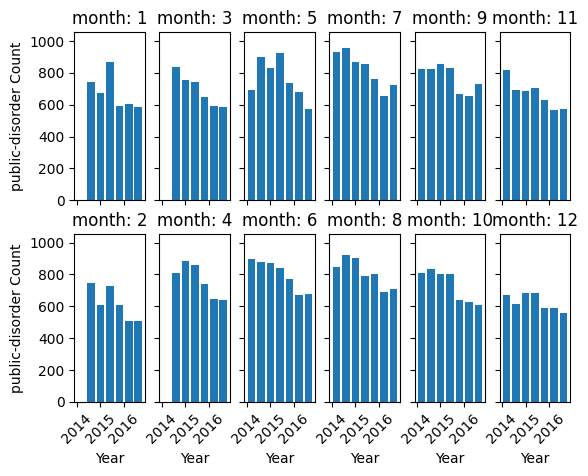

In [260]:
# this function will generate a plot which maps out the crime rates of a chosen crime year over year for every month
# it will assume month_crime_counts to be a map which contains 12 months labeled 0-11. Each month will contain a dictionary inside with all 14 crimes detailed by NIBRS.
# each crime will contain a list of each year that contains crime statistics for that crime. for 2013-2020 this list will be 7 long.
def plot_monthly_crime_rates_across_years(month_crime_counts, crime_chosen = "public-disorder"):
    fig, axs = plt.subplots(2,6)
    #we need dtype of x axis to be datetime
    x_axis_years = [date(year, 1, 1).year for year in range(2013, 2020)]
    max_crime_num = 0
    for month_ind in range(0, 12):
        month = month_ind + 1 #for readability month start at 1

        crime_rate = month_crime_counts[month][crime_chosen]
        if len(crime_rate) == 6:
            crime_rate = [0] + crime_rate
        
        max_crime_num = max(max_crime_num, max(crime_rate))

        x_axis = range(2013, 2020)
        axs[month_ind % 2, int(month_ind / 2)].bar(x_axis, crime_rate)
        axs[month_ind % 2, int(month_ind / 2)].set_title("month: " + str(month))
    for ax in axs.flat:
        ax.set(xlabel='Year', ylabel= crime_chosen + ' Count')
        ax.set_xticklabels(x_axis_years, rotation = 45)
        ax.set_ylim([0, max_crime_num * 1.1]) #lets set the y axis to be a bit larger than the max val observed.
    for ax in axs.flat:
        ax.label_outer()
    plt.savefig("figures/Public_Disorder_by_Month.png")
    plt.show()
plot_monthly_crime_rates_across_years(month_crime_counts)

Ok so we can see some variability month over month and year over year. What if we model each month as its own Normal distribution for each crime. Meaning any given Pre-Pandemic year the number of crimes that occur for public distrubance for example is modeled by a normal distribution. We can bring in our Mean and STD table we created above for this.

In [265]:
#import scipy stats norm package for later.
from scipy.stats import norm

In [264]:
#this will generate a cool plot of overlaying pdfs of a normal distribution given parallel arrays of means, stds, maxes and labels
def plot_norm(means, stds, maxs, labels, points, line_labels, mode="pdf", save=False, title="", path="figures/x.png"):
    x_axis = range(0,int(max(maxs) * 1.5))
    for i in range(len(means)):
        mean = means[i]
        std = stds[i]
        label= labels[i]
        if mode == "pdf":
            plt.plot(x_axis, norm.pdf(x_axis, mean, std), label=label)
        else:
            plt.plot(x_axis, norm.cdf(x_axis, mean, std), label=label)
    for i in range(len(points)):
        point = points[i]
        label = line_labels[i]
        plt.axvline(x = point, color = 'r', label = label)
    if save:
        plt.legend(loc="upper left")
        plt.title(title)
        plt.savefig(path)
    plt.show()

In [250]:
#this chart is just generated for the report, it is simply a blank normal distribution overing pre-pandemic public disorder
#plot_norm([809.14], [88.71], [920], ["pre pandemic public disorder distribution"], [], [], save=False, title="Pre-Pandemic Public Disorder August Distribution's")

With exploratory analysis done it is time to start testing hypothesis. 

Our first hypothesis is as follows: "The introduction of mask mandates increased public disorder crime by 15%, as those who actively broke masking mandates put strain on police forces"

We know the following: The mask mandate was introduced in Denver County on 07/16/2020. So lets compare the incedence of public disorder crime in the month of august 2020 and see its liklihood of occuring in a prepandemic year.

August 2020 Public Distrubance Case Count: 909
pre_pandemic_mean    809.142857
pre_pandemic_std      88.715704
pre_pandemic_min     691.000000
pre_pandemic_max     920.000000
pandemic_mean        933.500000
pandemic_std          34.648232
pandemic_min         909.000000
pandemic_max         958.000000
Name: (8, public-disorder), dtype: float64


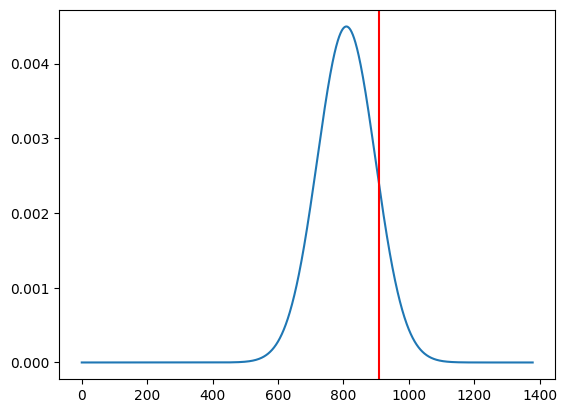

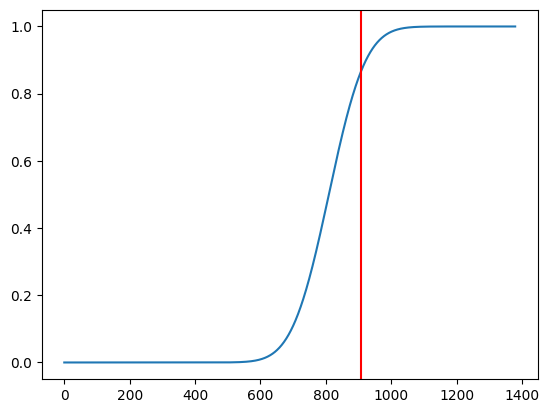

In [251]:
#how many public disorder crimes occured in the month of august 2020 after the mask mandate?
disorder_crime = pandemic_crime_categorized[(2020, 8, "public-disorder")]
print("August 2020 Public Distrubance Case Count: " + str(disorder_crime))
#lets print out the prepandemic mean and std for august!
print(combined_monthly_crime_categorized.loc[(8, "public-disorder")]) #we need the first two values here
# lets plot where our public disorder for the month of august 2020 resides on our prepandemic distribution.
plot_norm([809.14], [88.71], [920], ["Pre Pandemic Distribution"], [909], ["August 2020 Case Count"], save=SAVE_FIGURES, title="Hypothesis 1: Mask Ordinance and Public Disturbance", path="figures/hypothesis1_pdf.png")
plot_norm([809.14], [88.71], [920], ["Pre Pandemic Distribution"], [909], ["August 2020 Case Count"], mode="cdf", save=SAVE_FIGURES, title="Hypothesis 1: Mask Ordinance and Public Disturbance", path="figures/hypothesis1_cdf.png")

#here we get a 0.8721 CDF. Meaning it is 13% chance that under pre-pandemic conditions we get a public disturbance rate at or above 909 cases in August.

What does this tell us? This tells us that the month of august 2020 was within the range of possible values of the prepandemic public disorder distribution. Meaning we can not reject the null hypothesis that the mask mandate had no impact on public disorder crime in denver county

Hypothesis B: "Lock down increased domestic abuse by 20% as victims no longer could avoid their abusive partners and were more likely to be stuck in the home with them."

Colorado's stay at home order was issued Thursday March 26th at 6 AM and was lifted as a "requirement" on april 26th, however it was still considered encouraged for much longer than that. Because of this lets create this one month of data and classify domestic abuse as a mix of aggrevated assult and sexual assult, combining their values. We can then compare the incedence of these crimes to the pre-pandemic era in that same stretch. Running a basic T test.

Lockdown dates were sourced directly from: https://covid19.colorado.gov/public-health-orders-and-executive-orders


In [252]:
lockdown_begin = date(2020, 3, 26) 
lockdown_end = date(2020, 4, 26)

In [254]:
lockdown_crime = pandemic_crime[(pandemic_crime["date"] >= lockdown_begin) & (pandemic_crime["date"] <= lockdown_end)]
lockdown_crime = lockdown_crime[(lockdown_crime["offense_category_id"] == "aggravated-assault") | (lockdown_crime["offense_category_id"] == "sexual-assault")]
march_april_abuse_rates = lockdown_crime["incident_id"].nunique()


print("Number of Domestic abuse cases from March 26th to April 26th: " + str(march_april_abuse_rates))
pre_pandemic_crime_same_period = pre_pandemic_crime.query('(month == 3 & day >= 26) | (month == 4 & day <= 26)')
pre_pandemic_crime_same_period = pre_pandemic_crime_same_period[(pre_pandemic_crime_same_period["offense_category_id"] == "aggravated-assault") | (pre_pandemic_crime_same_period["offense_category_id"] == "sexual-assault")]
pre_pandemic_crime_same_period = pre_pandemic_crime_same_period.groupby(["year"])["incident_id"].nunique()
pre_pandemic_domestic_abuse_mean = np.mean(pre_pandemic_crime_same_period)
pre_pandemic_domestic_abuse_std = np.std(pre_pandemic_crime_same_period)
pre_pandemic_domestic_abuse_max = max(pre_pandemic_crime_same_period)
print("Pre Pandemic Mean For Same Time Period: " + str(pre_pandemic_domestic_abuse_mean))
print("Pre Pandemic Standard Deviation For Same Time Period: " + str(pre_pandemic_domestic_abuse_std))

Number of Domestic abuse cases from March 26th to April 26th: 239
Pre Pandemic Mean For Same Time Period: 231.66666666666666
Pre Pandemic Standard Deviation For Same Time Period: 26.4365067451978


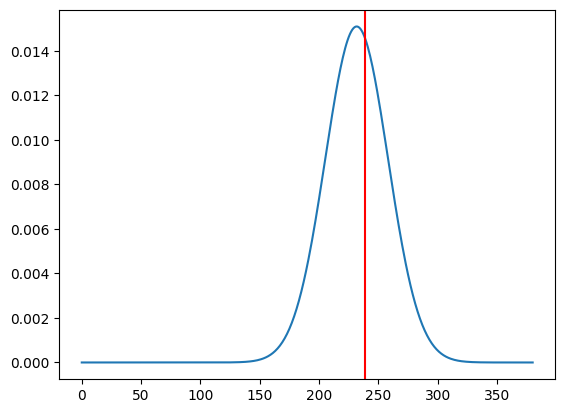

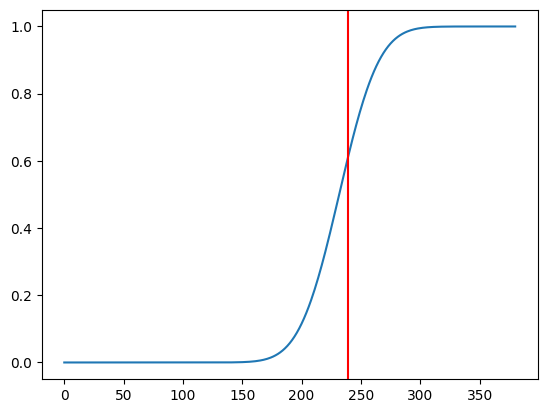

In [256]:
plot_norm([pre_pandemic_domestic_abuse_mean], [pre_pandemic_domestic_abuse_std], [pre_pandemic_domestic_abuse_max], ["Pre Pandemic Distribution"], \
          [march_april_abuse_rates], ["Lockdown Period Case Count"], save=SAVE_FIGURES, title="Hypothesis 2: Pandemic Lockdown and Abuse", path="figures/hypothesis2_pdf.png")
plot_norm([pre_pandemic_domestic_abuse_mean], [pre_pandemic_domestic_abuse_std], [pre_pandemic_domestic_abuse_max], ["Pre Pandemic Distribution"], \
          [march_april_abuse_rates], ["Lockdown Period Case Count"], mode="cdf", save=SAVE_FIGURES, title="Hypothesis 2: Pandemic Lockdown and Abuse", path="figures/hypothesis2_cdf.png")
#in this case our CDF left bound is 0.6208 meaning there is a 38% liklihood that 239 abuse cases are reported during the lockdown period in past years

Here again we are unable to disprove the null hypothesis that lockdowns had no impact on abuse during the lockdown orders. This may be due to unmonitored impacts such as under-reporting, or external factors which countered the increase in abuse crimes like call lines being set up or emergency shelters housing those falling victim to domestic abuse.

Hypothesis C: Stimulus checks reduced robbery and financial crimes by up to 10%, as people could finally put food on their tables, even for a week or two.

Much to the same trend as the previous hypothesis lets chart out robbery crime counts for the years BEFORE the pandemic, and then again when stimulous checks went into effect. Lets also chart robbery week by week in the time period just before and after the checks to see if we see a noticable dip

First round of stimulus checks hit peoples bank accounts on the 11th of April 2020 according CNBC: https://www.cnbc.com/2020/04/13/first-coronavirus-stimulus-checks-deposited.html

So lets look at the month of april day by day to see how robbery crime changed


In [148]:
stim_checks = date(2020, 4, 11)
april_begin = date(2020, 4, 1)
april_end = date(2020, 4, 30)

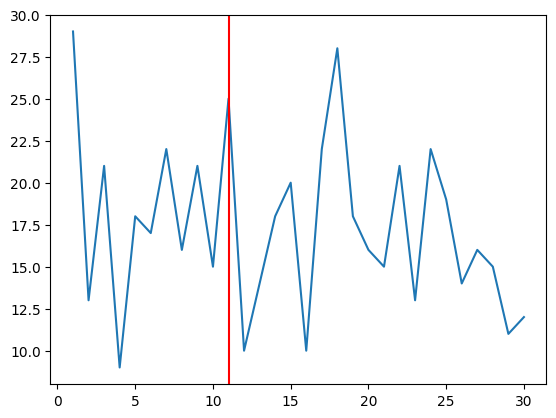

In [154]:
april_crime = pandemic_crime[(pandemic_crime["date"] >= april_begin) & (pandemic_crime["date"] <= april_end)]
april_crime = april_crime[(april_crime["offense_category_id"] == "robbery") | (april_crime["offense_category_id"] == "burglary")]
april_crime = april_crime.groupby(["day"])["incident_id"].nunique()
plt.plot(april_crime)
plt.axvline(x = 11, color = 'r', label = 'stim checks')
plt.show()

It does not appear that the stimulus checks had a noticible lasting impact on robbery or burglary when looking at this month alone, but what about if we zoom out a bit?

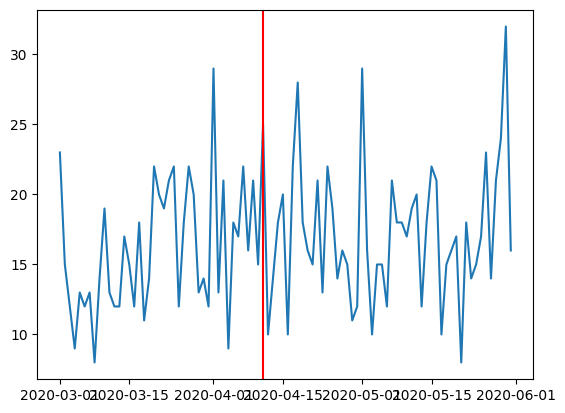

In [151]:

#lets look into may and see if we can see any changes
expanded_horizons_crime = pandemic_crime[(pandemic_crime["date"] >= date(2020, 3, 1)) & (pandemic_crime["date"] <= date(2020, 5, 31))]
expanded_horizons_crime = expanded_horizons_crime[(expanded_horizons_crime["offense_category_id"] == "robbery") | (expanded_horizons_crime["offense_category_id"] == "burglary")]
expanded_horizons_crime = expanded_horizons_crime.groupby(["date"])["incident_id"].nunique()
plt.plot(expanded_horizons_crime)
plt.axvline(x = stim_checks, color = 'r', label = 'stim checks')
plt.show()

Again it does not really appear to have impacted robbery or burglary in the imediate timescale. What if we compare it to our pre_pandemic distributions?

In [257]:
sum_robbery_april_2020 = sum(april_crime)
print(sum_robbery_april_2020)
pre_pandemic_robbery_same_period_april = pre_pandemic_crime.query('month == 4')
pre_pandemic_robbery_same_period_april = pre_pandemic_robbery_same_period_april[(pre_pandemic_robbery_same_period_april["offense_category_id"] == "robbery") | \
                                                                                (pre_pandemic_robbery_same_period_april["offense_category_id"] == "burglary")]
pre_pandemic_robbery_same_period_april = pre_pandemic_robbery_same_period_april.groupby(["year"])["incident_id"].nunique()

pre_pandemic_robbery_abuse_mean = np.mean(pre_pandemic_robbery_same_period_april)
pre_pandemic_robbery_abuse_std = np.std(pre_pandemic_robbery_same_period_april)
pre_pandemic_robbery_abuse_max = max(pre_pandemic_robbery_same_period_april)
print("Pre Pandemic Mean For Same Time Period: " + str(pre_pandemic_robbery_abuse_mean))
print("Pre Pandemic Standard Deviation For Same Time Period: " + str(pre_pandemic_robbery_abuse_std))

520
Pre Pandemic Mean For Same Time Period: 423.5
Pre Pandemic Standard Deviation For Same Time Period: 33.609274513641815


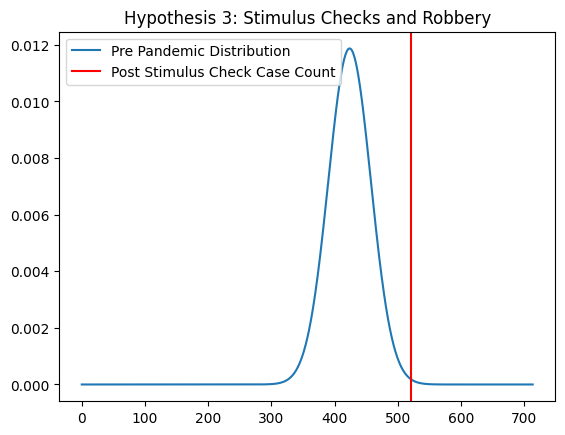

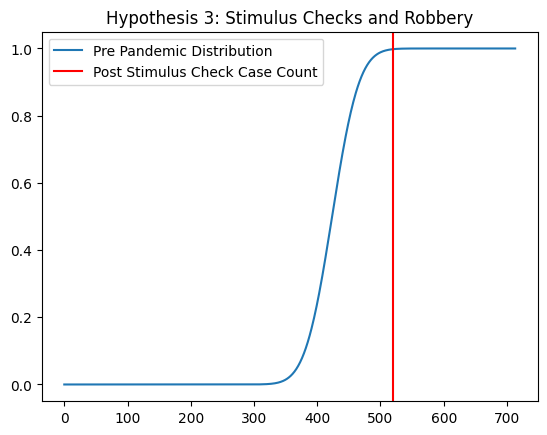

In [219]:
plot_norm([pre_pandemic_robbery_abuse_mean], [pre_pandemic_robbery_abuse_std], [pre_pandemic_robbery_abuse_max], ["Pre Pandemic Distribution"], \
          [sum_robbery_april_2020], ["Post Stimulus Check Case Count"], save=SAVE_FIGURES, title="Hypothesis 3: Stimulus Checks and Robbery", path="figures/hypothesis3_pdf.png")

plot_norm([pre_pandemic_robbery_abuse_mean], [pre_pandemic_robbery_abuse_std], [pre_pandemic_robbery_abuse_max], ["Pre Pandemic Distribution"], \
          [sum_robbery_april_2020], ["Post Stimulus Check Case Count"], save=SAVE_FIGURES, title="Hypothesis 3: Stimulus Checks and Robbery", path="figures/hypothesis3_cdf.png", mode="cdf")

What does this tell us? This tells us we can reject the null hypothesis that there is no difference between pandemic and prepandemic robbery and burglary rates. There is a statistically significant rise in robbery type crime, however the stimulus checks did not reduce this value.